In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import datetime

%matplotlib inline
plt.style.use('default')
plt.rcParams.update({'font.size': 12})

In [2]:
# FX
USDHKD = 7.85
AUDUSD = 0.71

### Importing scraped supplier price data

In [3]:
supplier = pd.read_csv('supplier_px.csv')
supplier = supplier.iloc[:,1:]

In [4]:
supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Brand   2682 non-null   object
 1   Model   2682 non-null   object
 2   Price   2682 non-null   int64 
 3   Date    2682 non-null   object
dtypes: int64(1), object(3)
memory usage: 83.9+ KB


In [5]:
supplier

,Brand,Model,Price,Date
0,APPLE,iPhone 5 16GB/32GB/64GB,50,2019-09-08 00:00:00
1,APPLE,iPhone 5s 16GB,100,2019-09-08 00:00:00
2,APPLE,iPhone 5s 32GB 64GB,150,2019-09-08 00:00:00
3,APPLE,iPhone 5c 16GB,100,2019-09-08 00:00:00
4,APPLE,iPhone 5c 32GB,100,2019-09-08 00:00:00
...,...,...,...,...
2677,Xiaomi,小米 10 (8+128GB) （8+256GB/+HK$200）（12+256GB/+H...,1800,2022-02-12 00:00:00
2678,Xiaomi,小米 10T pro (8+256GB),2000,2022-02-12 00:00:00
2679,Xiaomi,小米 9pro (8+128GB) （8+256GB/+HK$200）（12+256GB/...,1400,2022-02-12 00:00:00
2680,Xiaomi,小米9 (6+128GB) （8+128GB/+HK$100）（8+256GB/+HK$300）,1000,2022-02-12 00:00:00


In [6]:
supplier = supplier.replace('Apple','APPLE')
supplier = supplier.replace('Huawei ','Huawei')
supplier.Price = supplier.Price.astype('int') #pd.to_numeric(df.Price)
supplier['Price_USD'] = supplier.Price.apply(lambda x: round(x / USDHKD,2))
supplier.Date = pd.to_datetime(supplier.Date, format='%Y-%m-%d')

In [7]:
supplier.groupby(['Date', 'Brand']).Price.mean()

Date        Brand       
2019-09-08  APPLE           1724.305556
            HTC             1066.666667
            Huawei          1615.476190
            LG              1320.000000
            Samsung          783.962264
                               ...     
2022-02-12  Huawei          1305.000000
            LG               890.000000
            Samsung         1832.031250
            Sony             954.000000
            Xiaomi          2000.000000
Name: Price, Length: 81, dtype: float64

### Slicing for iPhone 11 Data

In [8]:
# slice iPhone 11-only
list11 = []
for i in range(len(supplier.Model)):
    if re.search('iPhone 11',supplier.Model.iloc[i]) != None:
        list11.append([supplier.Model.iloc[i], supplier.Price.iloc[i], supplier.Price_USD.iloc[i], supplier.Date.iloc[i]])

list11[0:10]

[['iPhone 11 64GB', 3900, 496.82, Timestamp('2020-07-27 00:00:00')],
 ['iPhone 11 128GB', 4300, 547.77, Timestamp('2020-07-27 00:00:00')],
 ['iPhone 11 256GB', 4600, 585.99, Timestamp('2020-07-27 00:00:00')],
 ['iPhone 11 pro 64GB', 5500, 700.64, Timestamp('2020-07-27 00:00:00')],
 ['iPhone 11 pro 256GB', 6500, 828.03, Timestamp('2020-07-27 00:00:00')],
 ['iPhone 11 pro 512GB', 6800, 866.24, Timestamp('2020-07-27 00:00:00')],
 ['iPhone 11 pro max 64GB', 6200, 789.81, Timestamp('2020-07-27 00:00:00')],
 ['iPhone 11 pro max 256GB', 7000, 891.72, Timestamp('2020-07-27 00:00:00')],
 ['iPhone 11 pro max 512GB', 7350, 936.31, Timestamp('2020-07-27 00:00:00')],
 ['iPhone 11 64GB', 3600, 458.6, Timestamp('2020-09-13 00:00:00')]]

In [9]:
supplier11 = pd.DataFrame(list11, columns=['Model','Price', 'Price_USD','Date'])

In [10]:
len(supplier11)

63

In [11]:
# latest period iPhone 11 prices
supplier11.tail(9).describe()

,Price,Price_USD
count,9.000000,9.000000
mean,3355.555556,427.460000
std,771.137327,98.234773
min,2300.000000,292.990000
25%,2700.000000,343.950000
50%,3500.000000,445.860000
75%,3700.000000,471.340000
max,4550.000000,579.620000


### Dataframe for Apple iPhone 11 Prices Over Time

In [12]:
aapl11 = pd.read_csv('AAPL_iphone_px.csv')
aapl11

,Model,Price_USD,Date
0,iPhone 11 64GB,699,20-09-2019
1,iPhone 11 128GB,749,20-09-2019
2,iPhone 11 256GB,849,20-09-2019
3,iPhone 11 pro 64GB,999,20-09-2019
4,iPhone 11 pro 256GB,1149,20-09-2019
5,iPhone 11 pro 512GB,1349,20-09-2019
6,iPhone 11 pro max 64GB,1099,20-09-2019
7,iPhone 11 pro max 256GB,1249,20-09-2019
8,iPhone 11 pro max 512GB,1449,20-09-2019
9,iPhone 11 64GB,599,13-10-2020


In [13]:
aapl11.Date = pd.to_datetime(aapl11.Date, format='%d-%m-%Y')
aapl11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Model      16 non-null     object        
 1   Price_USD  16 non-null     int64         
 2   Date       16 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 512.0+ bytes


In [14]:
AAPL11_64GB = aapl11[(aapl11.Model == 'iPhone 11 64GB')]
AAPL11_128GB = aapl11[(aapl11.Model == 'iPhone 11 128GB')]

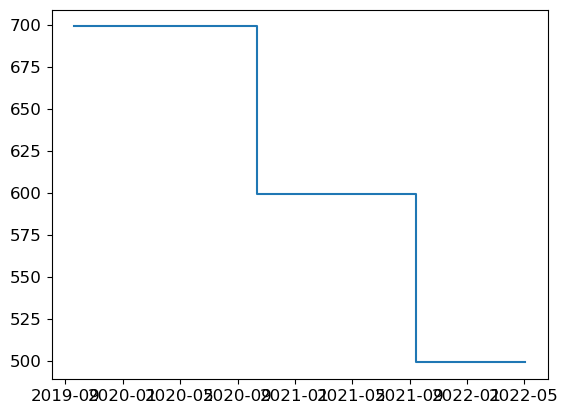

In [15]:
# test step plot
plt.step(x=AAPL11_64GB.Date, y=AAPL11_64GB.Price_USD, where='post')

### Plotting Price vs Cost Charts

In [16]:
# Data formatting to for consistency in chart presentation

# isolating iphone 11 supplier pricing for comparison to apple's
MKW11_64GB = supplier11[(supplier11.Model == 'iPhone 11 64GB')]
MKW11_128GB = supplier11[(supplier11.Model == 'iPhone 11 128GB')]

# creating first and last values for supplier price to match apple px
# cloning first and last rows
MKW11_64GB = MKW11_64GB.append(MKW11_64GB.iloc[-1])
MKW11_64GB = MKW11_64GB.append(MKW11_64GB.iloc[0])
# converting dates to of first and last rows to match apple data
MKW11_64GB.iloc[-2,-1] = datetime(2022,5,4)
MKW11_64GB.iloc[-1,-1] = datetime(2020,1,1)
# reformat df
MKW11_64GB.sort_values(by='Date', inplace=True)
MKW11_64GB.reset_index(inplace=True)
MKW11_64GB = MKW11_64GB.iloc[:,1:]

# same process for 128GB model
MKW11_128GB = MKW11_128GB.append(MKW11_128GB.iloc[-1])
MKW11_128GB = MKW11_128GB.append(MKW11_128GB.iloc[0])
MKW11_128GB.iloc[-2,-1] = datetime(2022,5,4)
MKW11_128GB.iloc[-1,-1] = datetime(2020,1,1)
MKW11_128GB.sort_values(by='Date', inplace=True)
MKW11_128GB.reset_index(inplace=True)
MKW11_128GB = MKW11_128GB.iloc[:,1:]

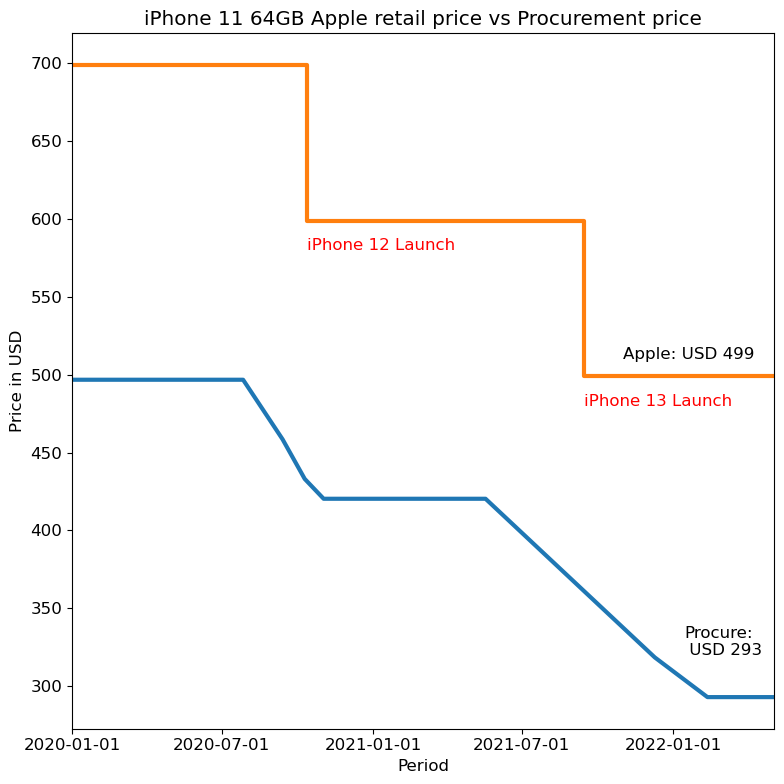

In [17]:
# Plotting Apple iPhone retail price vs procurement cost

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(MKW11_64GB.Date, MKW11_64GB.Price_USD, linewidth=3)
plt.step(AAPL11_64GB.Date, AAPL11_64GB.Price_USD, where='post', linewidth=3)
plt.xlim(datetime(2020,1,1),datetime(2022,5,4))

# annotate
ax.annotate('Apple: USD 499',xy=(datetime(2021,11,1),510), color='black')
ax.annotate('Procure:\n USD 293',xy=(datetime(2022,1,15),320), color='black')
ax.annotate('iPhone 12 Launch',xy=(datetime(2020,10,13),580), color='red')
ax.annotate('iPhone 13 Launch',xy=(datetime(2021,9,15),480), color='red')
# formating
#ax.fill_between(AAPL11_64GB.Date, AAPL11_64GB.Price_USD, color='blue', step='post')
#ax.fill_between(MKW11_64GB.Date, MKW11_64GB.Price_USD, color='white')
ax.set_xticks((datetime(2020,1,1),datetime(2020,7,1),datetime(2021,1,1),datetime(2021,7,1),datetime(2022,1,1)))
plt.title('iPhone 11 64GB Apple retail price vs Procurement price')
plt.xlabel('Period')
plt.ylabel('Price in USD')
fig.tight_layout()
plt.savefig('./images/MKWvAAPL64.png', transparent=True, bbox_inches = 'tight')
plt.show()


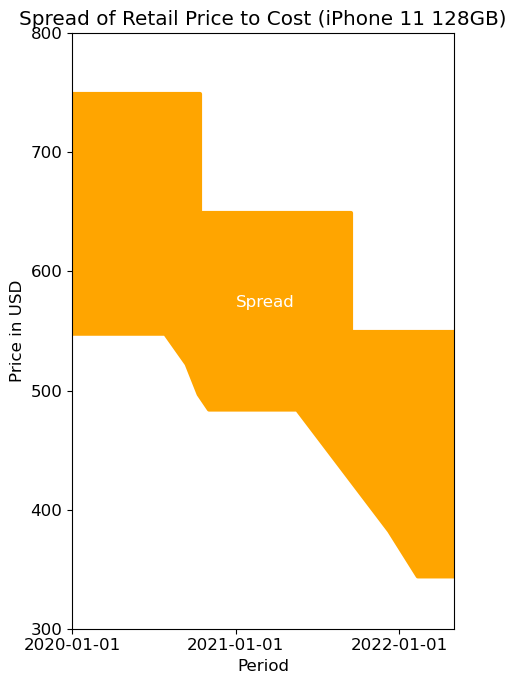

In [18]:
# Plotting spread of retail to procurement cost

fig, ax = plt.subplots(figsize=(5,7))
plt.plot(MKW11_128GB.Date, MKW11_128GB.Price_USD, linewidth=3, color='orange')
plt.step(AAPL11_128GB.Date, AAPL11_128GB.Price_USD, where='post', linewidth=3, color = 'orange')
plt.xlim(datetime(2020,1,1),datetime(2022,5,4))
plt.ylim(300,800)

# annotate
ax.annotate('Spread',xy=(datetime(2021,1,1),570), color='white')
#ax.annotate('Sourcing',xy=(datetime(2022,1,1),330), color='blue')
#ax.annotate('iPhone 12 Launch',xy=(datetime(2020,10,13),580), color='red')
#ax.annotate('iPhone 13 Launch',xy=(datetime(2021,9,15),480), color='red')
# formating
ax.fill_between(AAPL11_128GB.Date, AAPL11_128GB.Price_USD, color='orange', step='post')
ax.fill_between(MKW11_128GB.Date, MKW11_128GB.Price_USD, color='white')
plt.title('Spread of Retail Price to Cost (iPhone 11 128GB)')
plt.xlabel('Period')
plt.ylabel('Price in USD')
fig.tight_layout()
ax.set_xticks((datetime(2020,1,1),datetime(2021,1,1),datetime(2022,1,1)))
plt.savefig('./images/MKWvAAPL128.png', transparent=True, bbox_inches = 'tight')
plt.show()


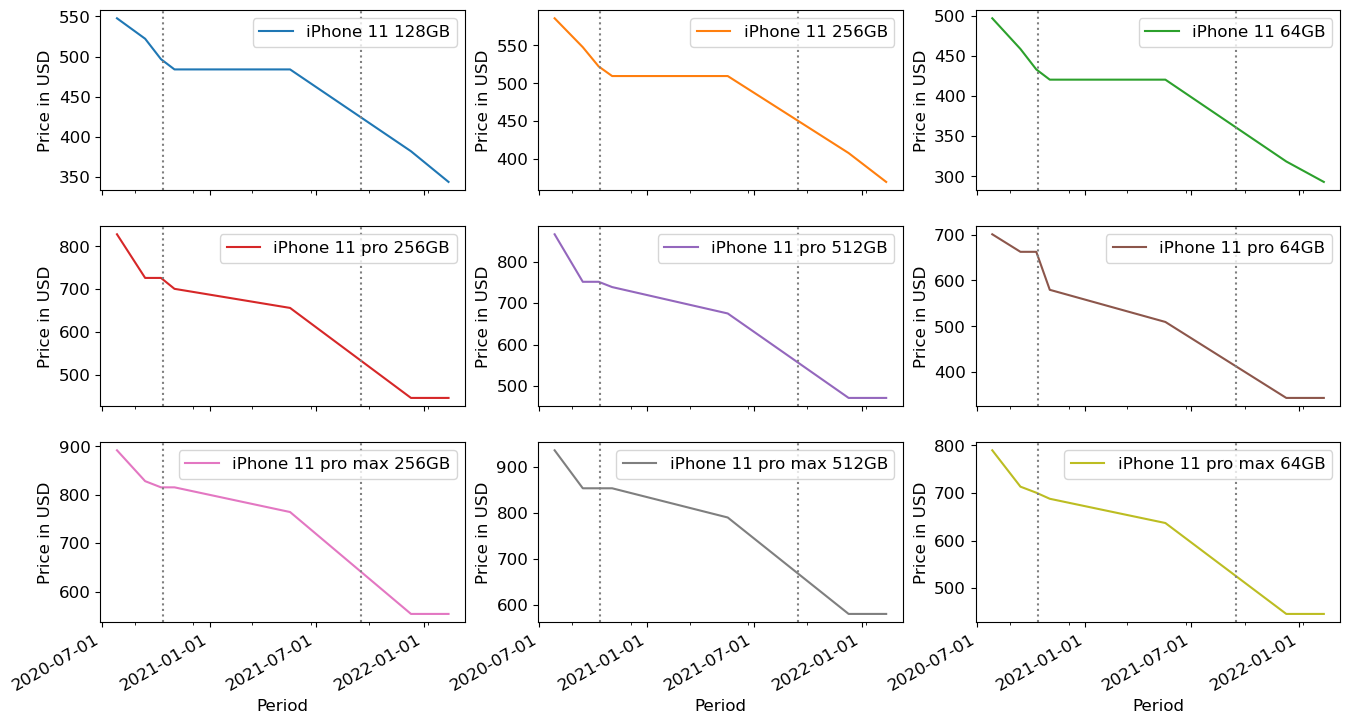

In [19]:
# Plotting iPhone procurement costs by model

ax = supplier11.groupby(['Date','Model'])['Price_USD'].mean().unstack(1).\
plot.line(subplots=True, layout=(3,3), figsize=(16,9), xlabel='Period', ylabel='Price in USD')

for chart in ax:
    for ax1 in chart:
        ax1.axvline(x=datetime(2020,10,13), linestyle='dotted', label='iPhone 12 launch', color='gray')
        ax1.axvline(x=datetime(2021,9,15), linestyle='dotted', label='iPhone 13 launch', color='gray')
        ax1.set_xticks((datetime(2020,7,1),datetime(2021,1,1),datetime(2021,7,1),datetime(2022,1,1))) 

fig.tight_layout()
#plt.savefig('MKWmulti.png', transparent=True)
plt.show()

### Importing Competitor Price Scraping Data

In [20]:
df_px = pd.read_csv('final_data.csv')

In [21]:
df_px['PriceTotalUSD'] = df_px.PriceTotal.apply(lambda x:x * AUDUSD)

In [22]:
df_px.describe()

,Unnamed: 0,Unnamed: 0.1,ItemPrice,Delivery,PriceTotal,PriceTotalUSD
count,1171.000000,1171.000000,1170.000000,1171.000000,1170.000000,1170.000000
mean,292.644748,292.644748,831.504547,2.925841,833.664513,591.901804
std,169.773439,169.773439,443.161090,27.699374,444.819693,315.821982
min,0.000000,0.000000,7.000000,0.000000,7.000000,4.970000
25%,146.000000,146.000000,699.000000,0.000000,699.000000,496.290000
50%,292.000000,292.000000,793.500000,0.000000,794.000000,563.740000
75%,438.500000,438.500000,899.000000,0.000000,899.000000,638.290000
max,606.000000,606.000000,9770.000000,899.000000,9770.000000,6936.700000


### Creating New DF for Refurbished iPhone Sales Price and Cost

In [23]:
# Slice refurbished data rows only, note 'Refubished' spelling
df_temp = df_px[(df_px.Condition == 'Refubished')]

In [24]:
# Add col to identify data origin
df_temp['Source'] = 'iPhone Merchants'

C:\Users\kforkai\AppData\Local\Temp/ipykernel_46844/3784930084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Source'] = 'iPhone Merchants'


In [25]:
# Create new dataframe of sellers data
df_temp = df_temp.iloc[:,9:13]
df_temp['Model'] = df_temp[['Model', 'Storage']].agg(' '.join, axis=1) 
df_temp.drop('Storage', axis=1, inplace=True)
df_temp.rename(columns = {'PriceTotalUSD':'Price_USD'}, inplace = True)
df_temp

,Model,Price_USD,Source
0,iPhone 11 64GB,401.150,iPhone Merchants
5,iPhone 11 64GB,378.785,iPhone Merchants
6,iPhone 11 64GB,379.850,iPhone Merchants
15,iPhone 11 64GB,583.620,iPhone Merchants
16,iPhone 11 64GB,384.820,iPhone Merchants
...,...,...,...
1165,iPhone 11 pro max 64GB,602.790,iPhone Merchants
1166,iPhone 11 pro max 64GB,569.420,iPhone Merchants
1167,iPhone 11 pro max 64GB,709.290,iPhone Merchants
1168,iPhone 11 pro max unspecified,580.780,iPhone Merchants


In [26]:
# Create second df of procurement data 
df_temp2 = supplier11.tail(9).drop(['Price','Date'], axis=1)
df_temp2['Source'] = 'Procurement'
df_temp2

,Model,Price_USD,Source
54,iPhone 11 64GB,292.99,Procurement
55,iPhone 11 128GB,343.95,Procurement
56,iPhone 11 256GB,369.43,Procurement
57,iPhone 11 pro 64GB,343.95,Procurement
58,iPhone 11 pro 256GB,445.86,Procurement
59,iPhone 11 pro 512GB,471.34,Procurement
60,iPhone 11 pro max 64GB,445.86,Procurement
61,iPhone 11 pro max 256GB,554.14,Procurement
62,iPhone 11 pro max 512GB,579.62,Procurement


In [27]:
# Combine dfs
df_box = pd.concat([df_temp, df_temp2])
df_box

,Model,Price_USD,Source
0,iPhone 11 64GB,401.150,iPhone Merchants
5,iPhone 11 64GB,378.785,iPhone Merchants
6,iPhone 11 64GB,379.850,iPhone Merchants
15,iPhone 11 64GB,583.620,iPhone Merchants
16,iPhone 11 64GB,384.820,iPhone Merchants
...,...,...,...
58,iPhone 11 pro 256GB,445.860,Procurement
59,iPhone 11 pro 512GB,471.340,Procurement
60,iPhone 11 pro max 64GB,445.860,Procurement
61,iPhone 11 pro max 256GB,554.140,Procurement


### Plot Competitor Price vs Cost

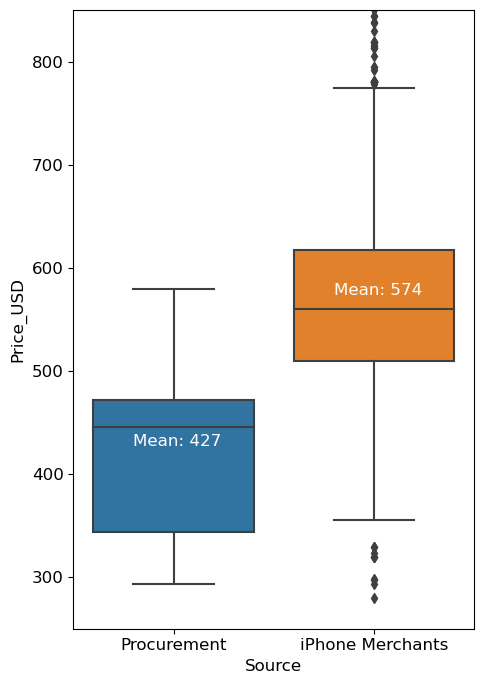

In [28]:
fig, ax = plt.subplots(figsize=(5,7))
sns.boxplot(x= df_box.Source, y = df_box.Price_USD, order=['Procurement','iPhone Merchants'])
plt.ylim(250,850)
# annotate
ax.annotate('Mean: 427',xy=(-0.2,427), color='white')
ax.annotate('Mean: 574',xy=(0.80,574), color='white')

fig.tight_layout()
plt.savefig('./images/costvprice.png', transparent=True)
plt.show()

<AxesSubplot:ylabel='Model'>

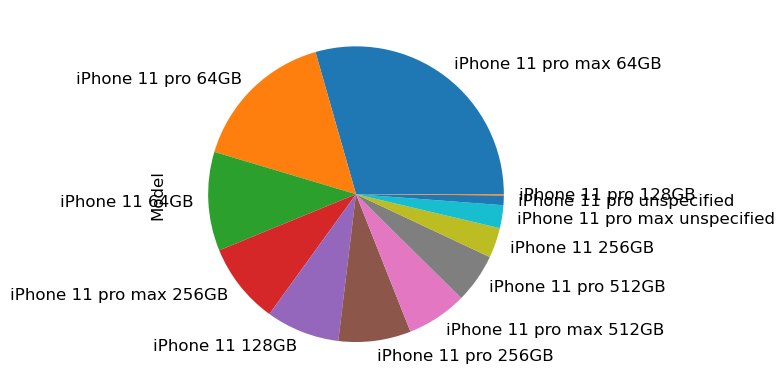

In [29]:
df_box[(df_box.Source == 'iPhone Merchants')].Model.value_counts(normalize=True).plot.pie()

In [30]:
df_box.groupby('Source').describe()

Price_USD                                                   \
                     count        mean         std     min      25%     50%   
Source                                                                        
Procurement            9.0  427.460000   98.234773  292.99  343.950  445.86   
iPhone Merchants     757.0  573.913203  124.688744  237.85  509.638  560.19   

                                  
                     75%     max  
Source                            
Procurement       471.34  579.62  
iPhone Merchants  616.99  993.29

#### Calculating gross profits per model

In [31]:
df_box.Model.value_counts()

iPhone 11 pro max 64GB           224
iPhone 11 pro 64GB               122
iPhone 11 64GB                    83
iPhone 11 pro max 256GB           68
iPhone 11 128GB                   62
iPhone 11 pro 256GB               61
iPhone 11 pro max 512GB           51
iPhone 11 pro 512GB               42
iPhone 11 256GB                   26
iPhone 11 pro max unspecified     19
iPhone 11 pro unspecified          8
iPhone 11 pro 128GB                1
Name: Model, dtype: int64

In [32]:
grossProfit = (df_box[(df_box.Source=='iPhone Merchants')].groupby('Model').Price_USD.mean() -
df_box[(df_box.Source=='Procurement')].groupby('Model').Price_USD.sum()).dropna()

In [33]:
order=['iPhone 11 64GB','iPhone 11 128GB','iPhone 11 256GB','iPhone 11 pro 64GB','iPhone 11 pro 256GB','iPhone 11 pro 512GB','iPhone 11 pro max 64GB','iPhone 11 pro max 256GB','iPhone 11 pro max 512GB']
grossProfit = grossProfit.reindex(index=order)

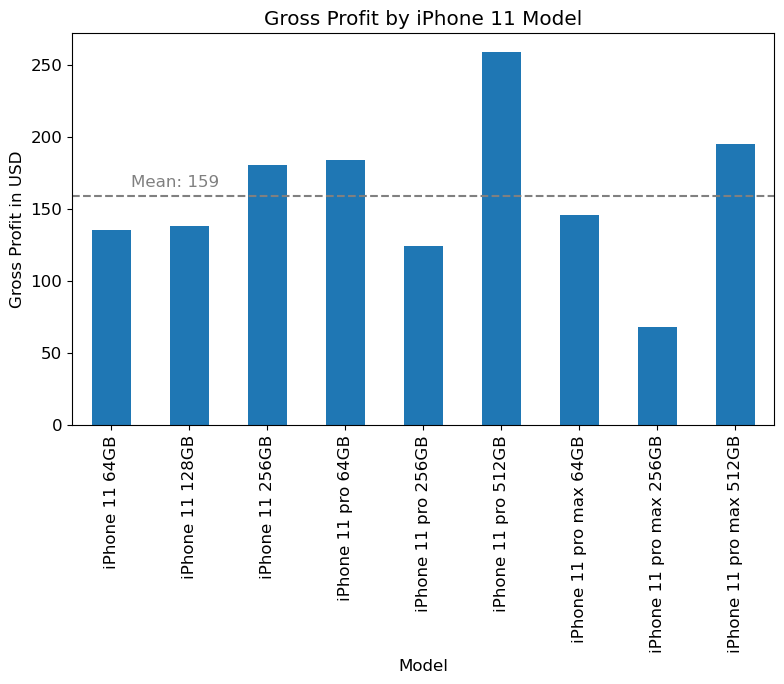

In [34]:
fig, ax = plt.subplots(figsize=(8,7))
grossProfit.plot.bar()
plt.axhline(y=grossProfit.mean(), linestyle='dashed', color='gray')
# annotate
ax.annotate('Mean: 159',xy=(0.25,165), color='gray')
plt.title('Gross Profit by iPhone 11 Model')
plt.ylabel('Gross Profit in USD')
fig.tight_layout()
plt.savefig('./images/grossprofit.png', transparent=True)
plt.show()

### Competitor Prices

In [35]:
df = pd.read_csv(r".\final_data.csv")

In [36]:
# data formatting
df.drop(['Unnamed: 0','Unnamed: 0.1' ], axis = 1, inplace = True)
df = df[df.Storage != 'unspecified']
df = df[df.ItemPrice != 9770]

df["Model_Storage"] = df["Model"]+' '+ df["Storage"]

#promax128 doest exist
df = df[df.Model_Storage != 'iPhone 11 pro max 128GB']
df = df[df.Model_Storage != 'iPhone 11 pro 128GB']

df = df[df.Condition != 'New']

df.head(1)

,Title,ItemLink,Merchant,ItemPrice,Delivery,PriceTotal,Condition,Model,Storage,Model_Storage
0,Apple iPhone 11 64GB Any Colour (Excellent Grade),https://www.kogan.com/au/buy/digitalstore-appl...,Kogan.com,565.0,0.0,565.0,Refubished,iPhone 11,64GB,iPhone 11 64GB


In [37]:
# USD conversion
df['PriceTotalUSD'] = df.PriceTotal.apply(lambda x:x * AUDUSD)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 1170
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          730 non-null    object 
 1   ItemLink       730 non-null    object 
 2   Merchant       730 non-null    object 
 3   ItemPrice      730 non-null    float64
 4   Delivery       730 non-null    float64
 5   PriceTotal     730 non-null    float64
 6   Condition      730 non-null    object 
 7   Model          730 non-null    object 
 8   Storage        730 non-null    object 
 9   Model_Storage  730 non-null    object 
 10  PriceTotalUSD  730 non-null    float64
dtypes: float64(4), object(7)
memory usage: 68.4+ KB


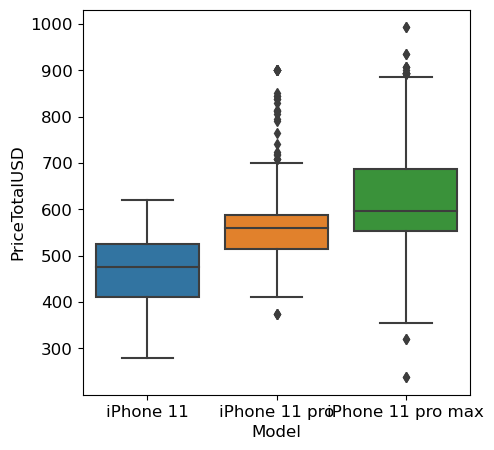

In [39]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Model', y='PriceTotalUSD', data=df)
plt.show()

<AxesSubplot:xlabel='Model_Storage', ylabel='PriceTotalUSD'>

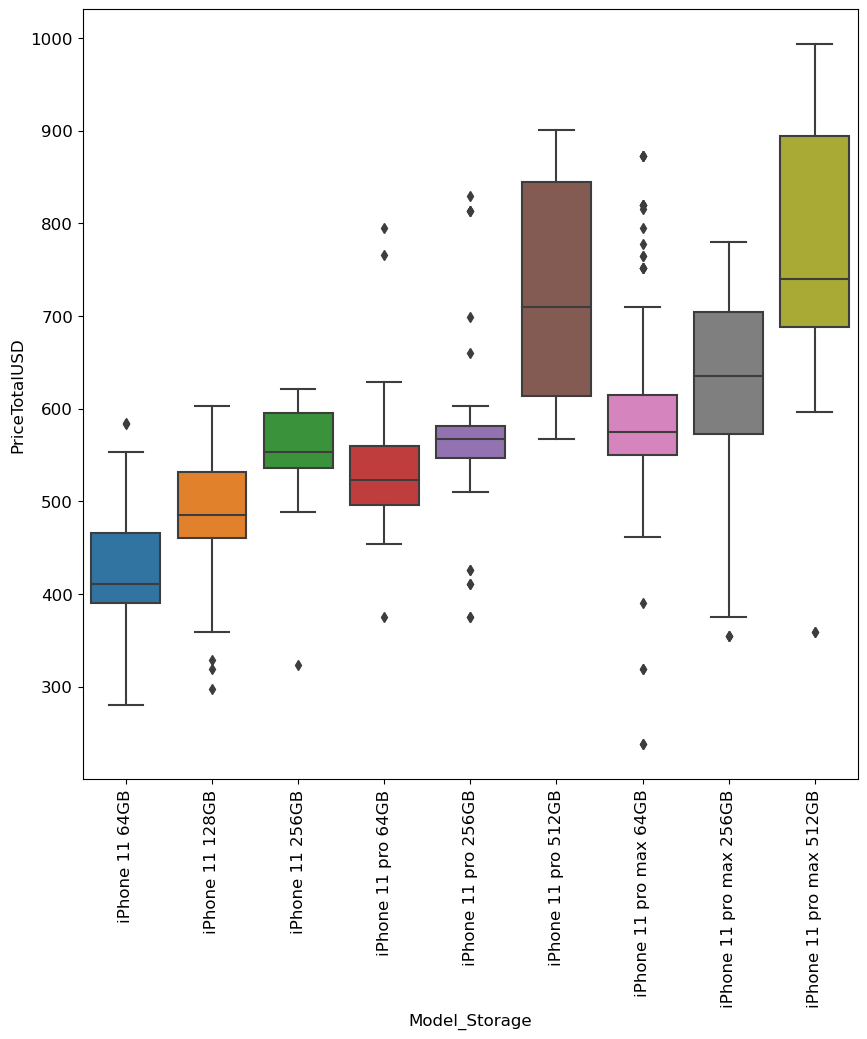

In [40]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='Model_Storage', y='PriceTotalUSD', data=df, order=['iPhone 11 64GB','iPhone 11 128GB','iPhone 11 256GB','iPhone 11 pro 64GB','iPhone 11 pro 256GB','iPhone 11 pro 512GB','iPhone 11 pro max 64GB','iPhone 11 pro max 256GB','iPhone 11 pro max 512GB'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)#, size = 30)
#ax.set_yticklabels(ax.get_xticklabels(), size = 30)
plt.savefig('./images/phonepx.png', transparent=True)
ax

In [41]:
df.groupby('Model_Storage').count().sort_values(by='Title', ascending=False)

,Title,ItemLink,Merchant,ItemPrice,Delivery,PriceTotal,Condition,Model,Storage,PriceTotalUSD
Model_Storage,,,,,,,,,,
iPhone 11 pro max 64GB,223,223,223,223,223,223,223,223,223,223
iPhone 11 pro 64GB,121,121,121,121,121,121,121,121,121,121
iPhone 11 64GB,82,82,82,82,82,82,82,82,82,82
iPhone 11 pro max 256GB,67,67,67,67,67,67,67,67,67,67
iPhone 11 128GB,61,61,61,61,61,61,61,61,61,61
iPhone 11 pro 256GB,60,60,60,60,60,60,60,60,60,60
iPhone 11 pro max 512GB,50,50,50,50,50,50,50,50,50,50
iPhone 11 pro 512GB,41,41,41,41,41,41,41,41,41,41
iPhone 11 256GB,25,25,25,25,25,25,25,25,25,25


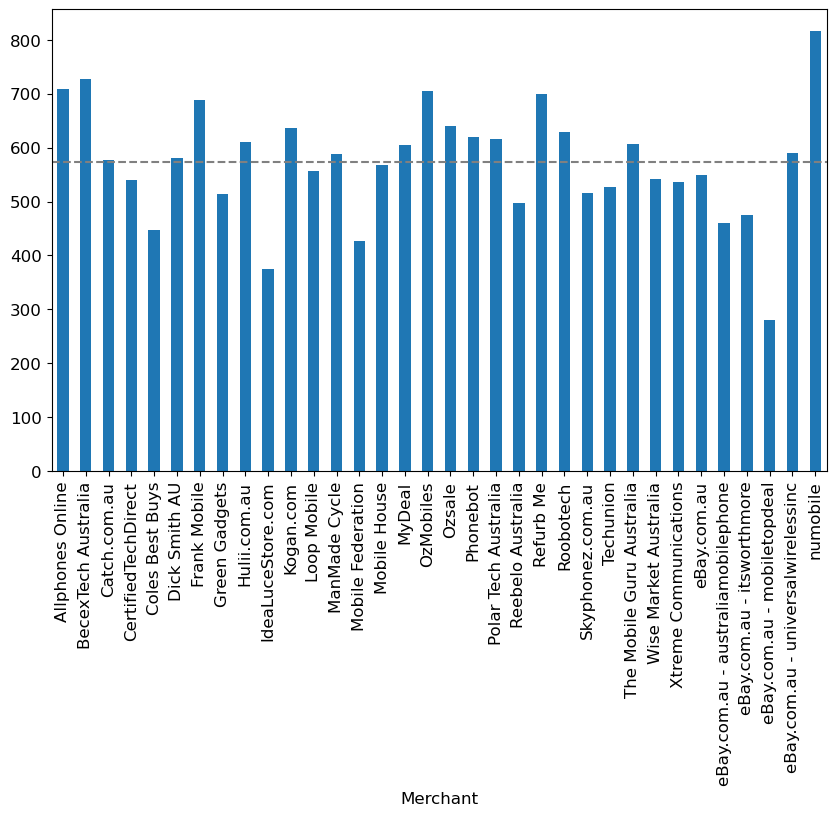

In [42]:
plt.figure(figsize=(10, 6))
plt.rc('font', size=12) 
df.groupby("Merchant")["PriceTotalUSD"].mean().plot(kind='bar')
plt.axhline(y=df.PriceTotalUSD.mean(), linestyle='dashed', color='gray')
fig.tight_layout()
plt.savefig('./images/merchantpx.png', transparent=True, bbox_inches = 'tight')
plt.show()